## Macro Dataset

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime

tickers = {
    # --- Equity Benchmarks ---
    'S&P 500': '^GSPC',
    'Nasdaq 100': '^NDX',
    'Dow Jones': '^DJI',
    'Russell 2000': '^RUT',
    'MSCI World': 'URTH',
    'Emerging Markets': 'EEM',

    # --- Volatility & Sentiment ---
    'VIX': '^VIX',
    'Nasdaq Volatility (VXN)': '^VXN',
    'VVIX': '^VVIX',
    'Bitcoin': 'BTC-USD',

    # --- Interest Rates ---
    'US 2Y Yield': '^IRX',
    'US 10Y Yield': '^TNX',
    'US 30Y Yield': '^TYX',
    '7-10Y Treasury Bond ETF': 'IEF',
    '20Y Treasury Bond ETF': 'TLT',
    'Fed Funds Futures': 'ZQ=F',
    'SOFR Futures (3M)': 'SR3=F',                     
    'EURIBOR Futures (3M)': 'FEI=F',                

    # --- Credit & Spread Risk ---
    'US Corporate Bonds': 'LQD',
    'High Yield Bonds': 'HYG',
    'Investment Grade Spread ETF': 'VCIT',         
    'Short-Term Credit ETF': 'VCSH',                 

    # --- Commodities ---
    'CRB Commodity Index ETF': 'COMT',
    'WTI Crude Oil': 'CL=F',
    'Brent Crude Oil': 'BZ=F',
    'Gold': 'GC=F',
    'Silver': 'SI=F',
    'Copper': 'HG=F',
    'Natural Gas': 'NG=F',

    # --- Inflation Proxies ---
    'Global Inflation-Protected Bonds ETF': 'WIP',
    'TIPS ETF': 'TIP',
    'Inflation Expectations ETF': 'RINF',
    'Commodities Index ETF': 'DBC',

    # --- FX & USD Strength ---
    'US Dollar Index': 'DX-Y.NYB',
    'USD/EUR': 'EURUSD=X',
    'USD/JPY': 'JPY=X',
    'USD/GBP': 'GBPUSD=X',
    'USD/CNY': 'CNY=X',

    # --- Core Sector ETFs ---
    'Tech ETF': 'XLK',
    'Financials ETF': 'XLF',
    'Healthcare ETF': 'XLV',
    'Energy ETF': 'XLE',
    'Consumer Discretionary ETF': 'XLY',

    # --- Additional Sector ETFs ---
    'Utilities ETF': 'XLU',
    'Consumer Staples ETF': 'XLP',
    'Industrials ETF': 'XLI',
    'Materials ETF': 'XLB',
    'Communication Services ETF': 'XLC',

    # --- Housing & Real Assets ---
    'Real Estate ETF': 'VNQ',
    'Home Construction ETF': 'ITB',
    'Mortgage REIT ETF': 'REM',
    'Convertible Securities ETF': 'CWB',
    'MBS ETF': 'MBB',

    # --- Global Trade Proxy ---
    'Baltic Dry Index ETF': 'BDRY'
}


# === Split time range ===
start_1 = "2004-01-01"
end_1 = "2014-12-31"
start_2 = "2015-01-01"
end_2 = datetime.today().strftime("%Y-%m-%d")

# === Download function with safe error handling ===
def fetch_data(start, end):
    df = yf.download(list(tickers.values()), start=start, end=end, interval="1d", group_by="ticker", progress=False)
    data = {}
    for label, symbol in tickers.items():
        try:
            sub = df.get(symbol)
            if sub is not None and 'Close' in sub:
                data[label] = sub['Close']
        except Exception as e:
            print(f"⚠️ Skipping {label} ({symbol}): {e}")
    return pd.DataFrame(data)

# === Download ===
print("Downloading 2004–2014...")
df_early = fetch_data(start_1, end_1)

print("Downloading 2015–2025...")
df_late = fetch_data(start_2, end_2)

# === Combine ===
macro_df = pd.concat([df_early, df_late])
macro_df.index.name = "Date"
macro_df = macro_df[~macro_df.index.duplicated(keep="first")]
macro_df = macro_df.sort_index()

print("Final shape:", macro_df.shape)
macro_df.head()

YF.download() has changed argument auto_adjust default to True



4 Failed downloads:
['XLC', 'SR3=F', 'BDRY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2004-01-01 -> 2014-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1072933200, endDate = 1420002000")')
['FEI=F']: HTTPError('HTTP Error 404: ')



1 Failed download:
['FEI=F']: HTTPError('HTTP Error 404: ')


Final shape: (6705, 54)


,S&P 500,Nasdaq 100,Dow Jones,Russell 2000,MSCI World,Emerging Markets,VIX,Nasdaq Volatility (VXN),VVIX,Bitcoin,...,Consumer Staples ETF,Industrials ETF,Materials ETF,Communication Services ETF,Real Estate ETF,Home Construction ETF,Mortgage REIT ETF,Convertible Securities ETF,MBS ETF,Baltic Dry Index ETF
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-02,1108.479980,1463.569946,10409.849609,560.849976,NaN,12.361112,18.219999,24.510000,NaN,NaN,...,12.534516,17.840204,16.711157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,1122.219971,1496.579956,10544.070312,568.919983,NaN,12.794835,17.490000,23.889999,NaN,NaN,...,12.616064,18.013670,17.050915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-06,1123.670044,1501.260010,10538.660156,569.890015,NaN,12.650259,16.730000,22.760000,NaN,NaN,...,12.645186,17.986990,16.899908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-07,1126.329956,1514.260010,10529.030273,574.619995,NaN,12.679770,15.500000,21.910000,NaN,NaN,...,12.592768,18.013670,16.811832,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

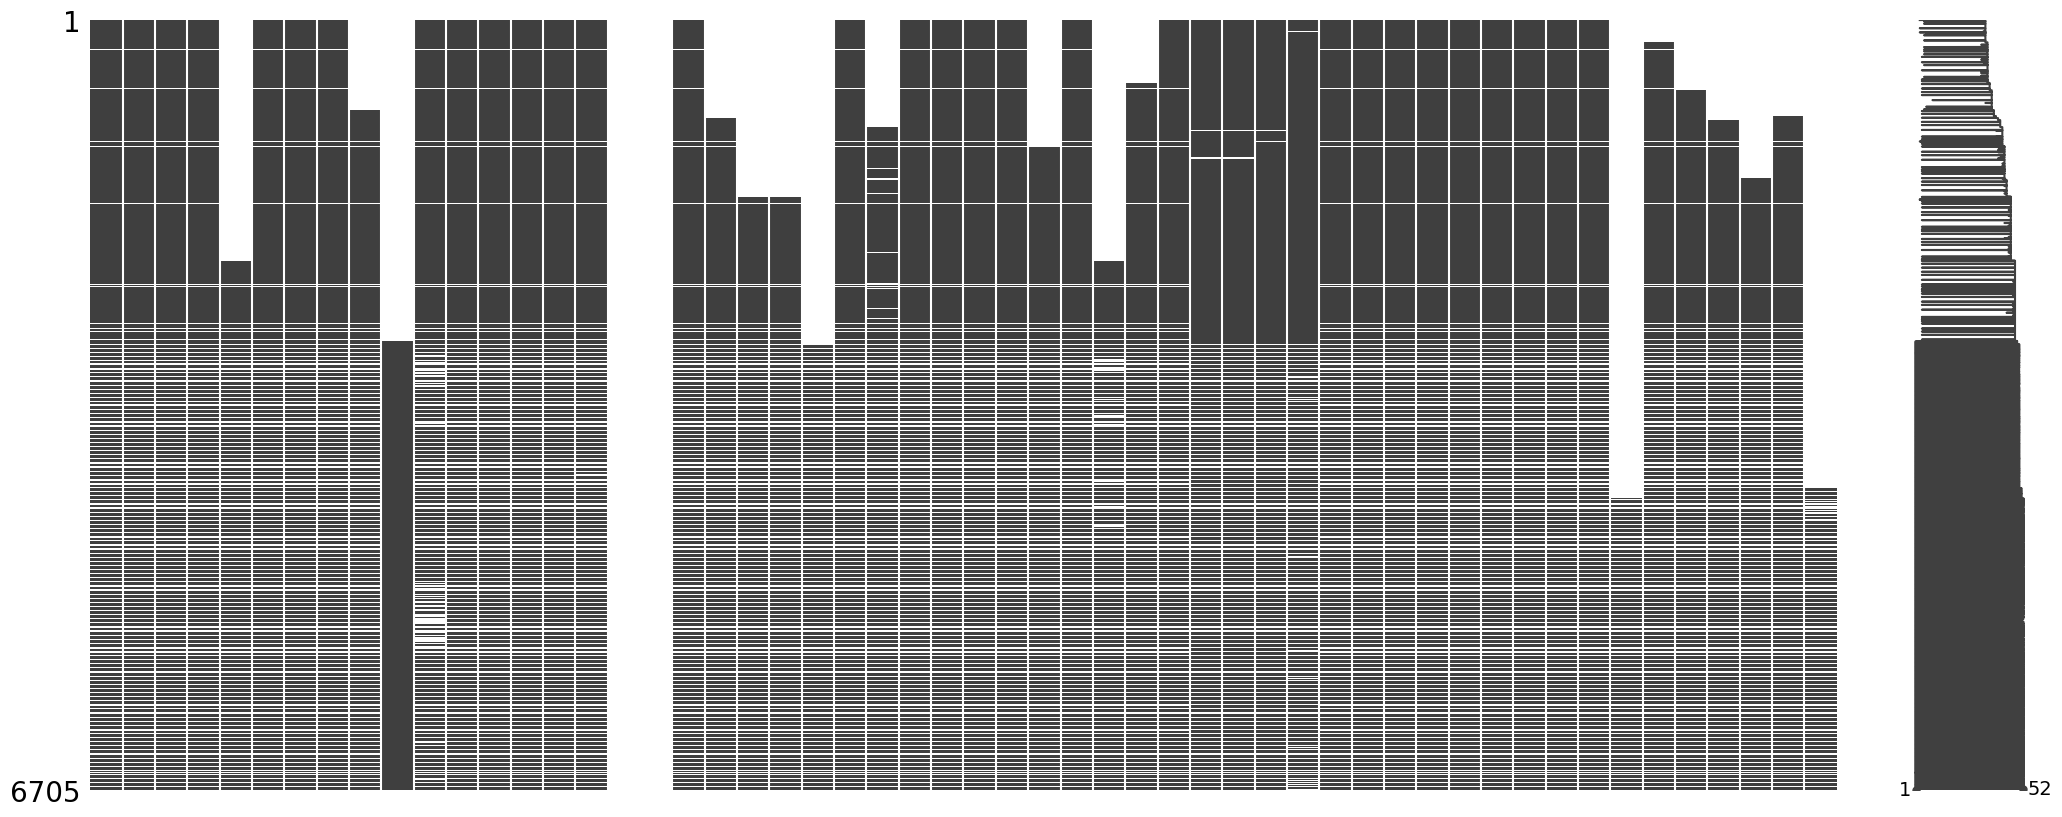

In [2]:
import missingno as msno
msno.matrix(macro_df)

In [6]:
start_date = "2004-01-01" # our reference date
macro_df_start = macro_df.loc[start_date:] # we filter df to only include rows from that date onward
macro_df_trimmed = macro_df_start.dropna(axis=1, how="all") # drop columns where *all* values are NaN in that date range
macro_df_trimmed.head()

,S&P 500,Nasdaq 100,Dow Jones,Russell 2000,MSCI World,Emerging Markets,VIX,Nasdaq Volatility (VXN),VVIX,Bitcoin,...,Consumer Staples ETF,Industrials ETF,Materials ETF,Communication Services ETF,Real Estate ETF,Home Construction ETF,Mortgage REIT ETF,Convertible Securities ETF,MBS ETF,Baltic Dry Index ETF
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-02,1108.479980,1463.569946,10409.849609,560.849976,NaN,12.361112,18.219999,24.510000,NaN,NaN,...,12.534516,17.840204,16.711157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,1122.219971,1496.579956,10544.070312,568.919983,NaN,12.794835,17.490000,23.889999,NaN,NaN,...,12.616064,18.013670,17.050915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-06,1123.670044,1501.260010,10538.660156,569.890015,NaN,12.650259,16.730000,22.760000,NaN,NaN,...,12.645186,17.986990,16.899908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-07,1126.329956,1514.260010,10529.030273,574.619995,NaN,12.679770,15.500000,21.910000,NaN,NaN,...,12.592768,18.013670,16.811832,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

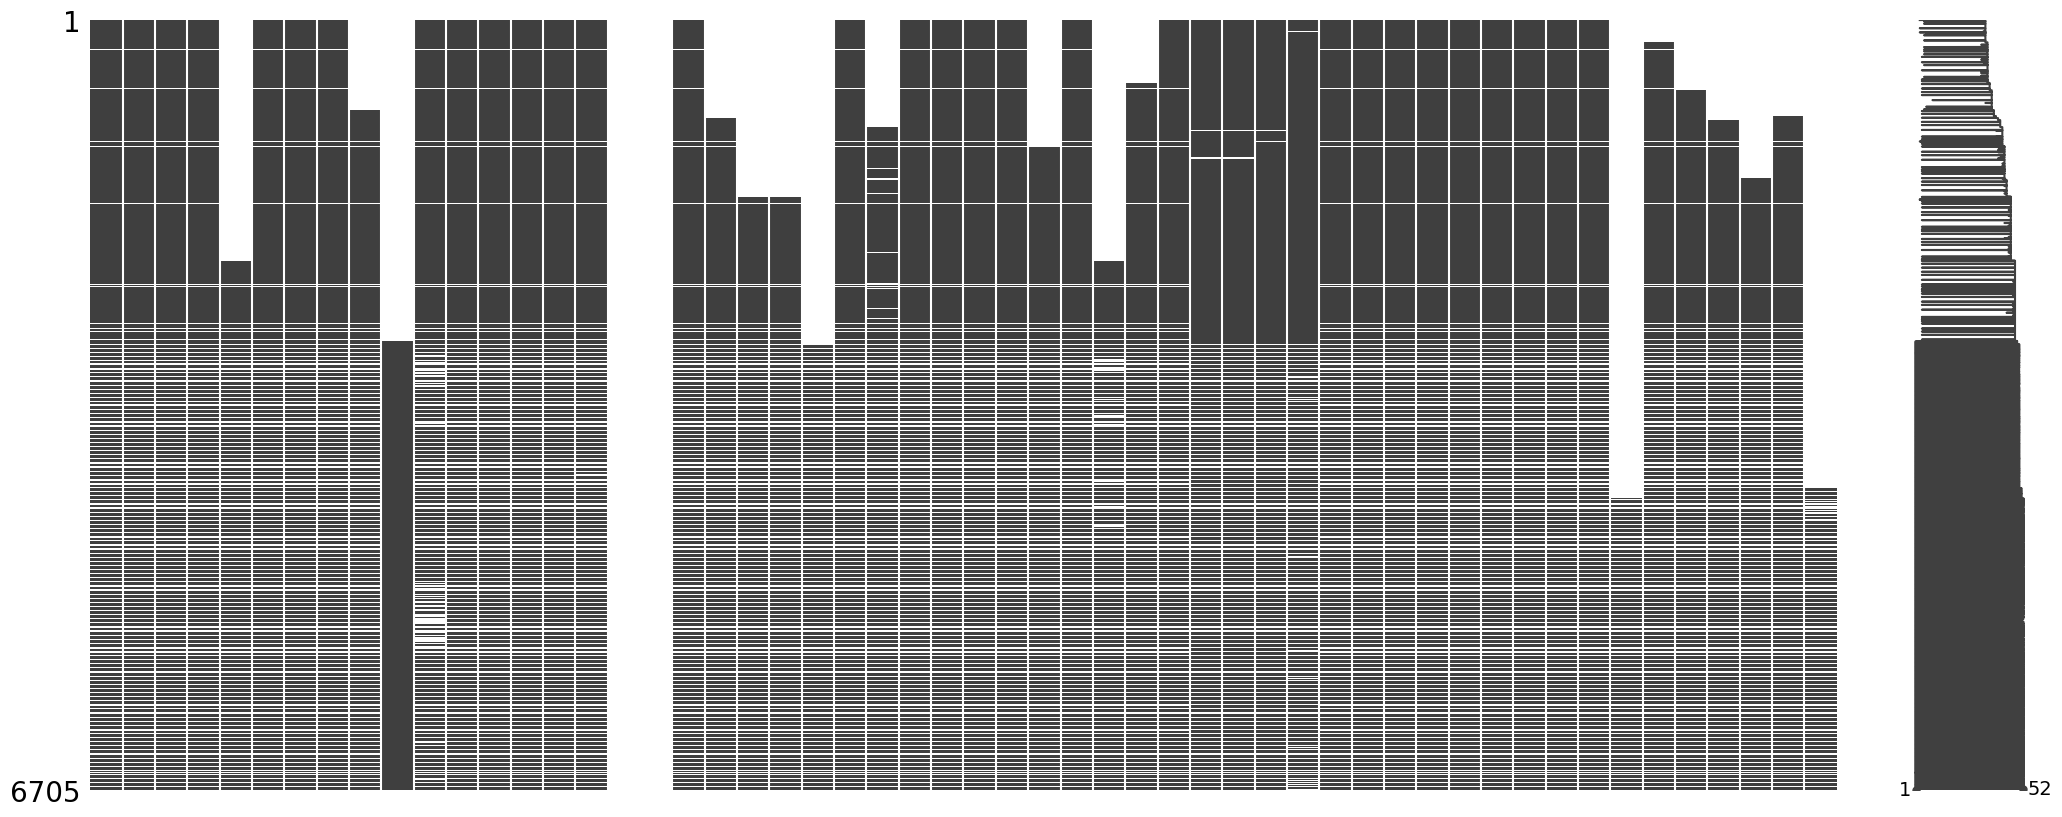

In [7]:
msno.matrix(macro_df)

In [9]:
import numpy as np

def max_consecutive_nans(series):
    """Returns the maximum number of consecutive NaNs in a Series."""
    return series.isna().astype(int).groupby(series.notna().cumsum()).sum().max()

# Set your threshold (e.g., drop any column with >180 consecutive NaNs ~ 6 months of missing data)
max_allowed_gap = 180

# Filter out columns that exceed the threshold
valid_columns = [col for col in macro_df.columns if max_consecutive_nans(macro_df[col]) <= max_allowed_gap]

# Apply filtering
macro_df_filtered = macro_df[valid_columns]
macro_df_filtered.head()

,S&P 500,Nasdaq 100,Dow Jones,Russell 2000,Emerging Markets,VIX,Nasdaq Volatility (VXN),US 2Y Yield,US 10Y Yield,US 30Y Yield,...,USD/CNY,Tech ETF,Financials ETF,Healthcare ETF,Energy ETF,Consumer Discretionary ETF,Utilities ETF,Consumer Staples ETF,Industrials ETF,Materials ETF
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-02,1108.479980,1463.569946,10409.849609,560.849976,12.361112,18.219999,24.510000,0.902,4.373,5.176,...,8.266900,15.476839,14.818276,21.224594,15.314384,24.030807,11.127328,12.534516,17.840204,16.711157
2004-01-05,1122.219971,1496.579956,10544.070312,568.919983,12.794835,17.490000,23.889999,0.902,4.387,5.175,...,8.267000,15.854705,14.939609,21.322910,15.609103,24.238638,11.146448,12.616064,18.013670,17.050915
2004-01-06,1123.670044,1501.260010,10538.660156,569.890015,12.650259,16.730000,22.760000,0.901,4.277,5.106,...,8.267100,15.998282,14.934336,21.386131,15.592423,24.331007,11.122541,12.645186,17.986990,16.899908
2004-01-07,1126.329956,1514.260010,10529.030273,574.619995,12.679770,15.500000,21.910000,0.886,4.246,5.084,...,8.267201,16.073854,14.944890,21.519571,15.431157,24.438763,11.179922,12.592768,18.013670,16.811832


<Axes: >

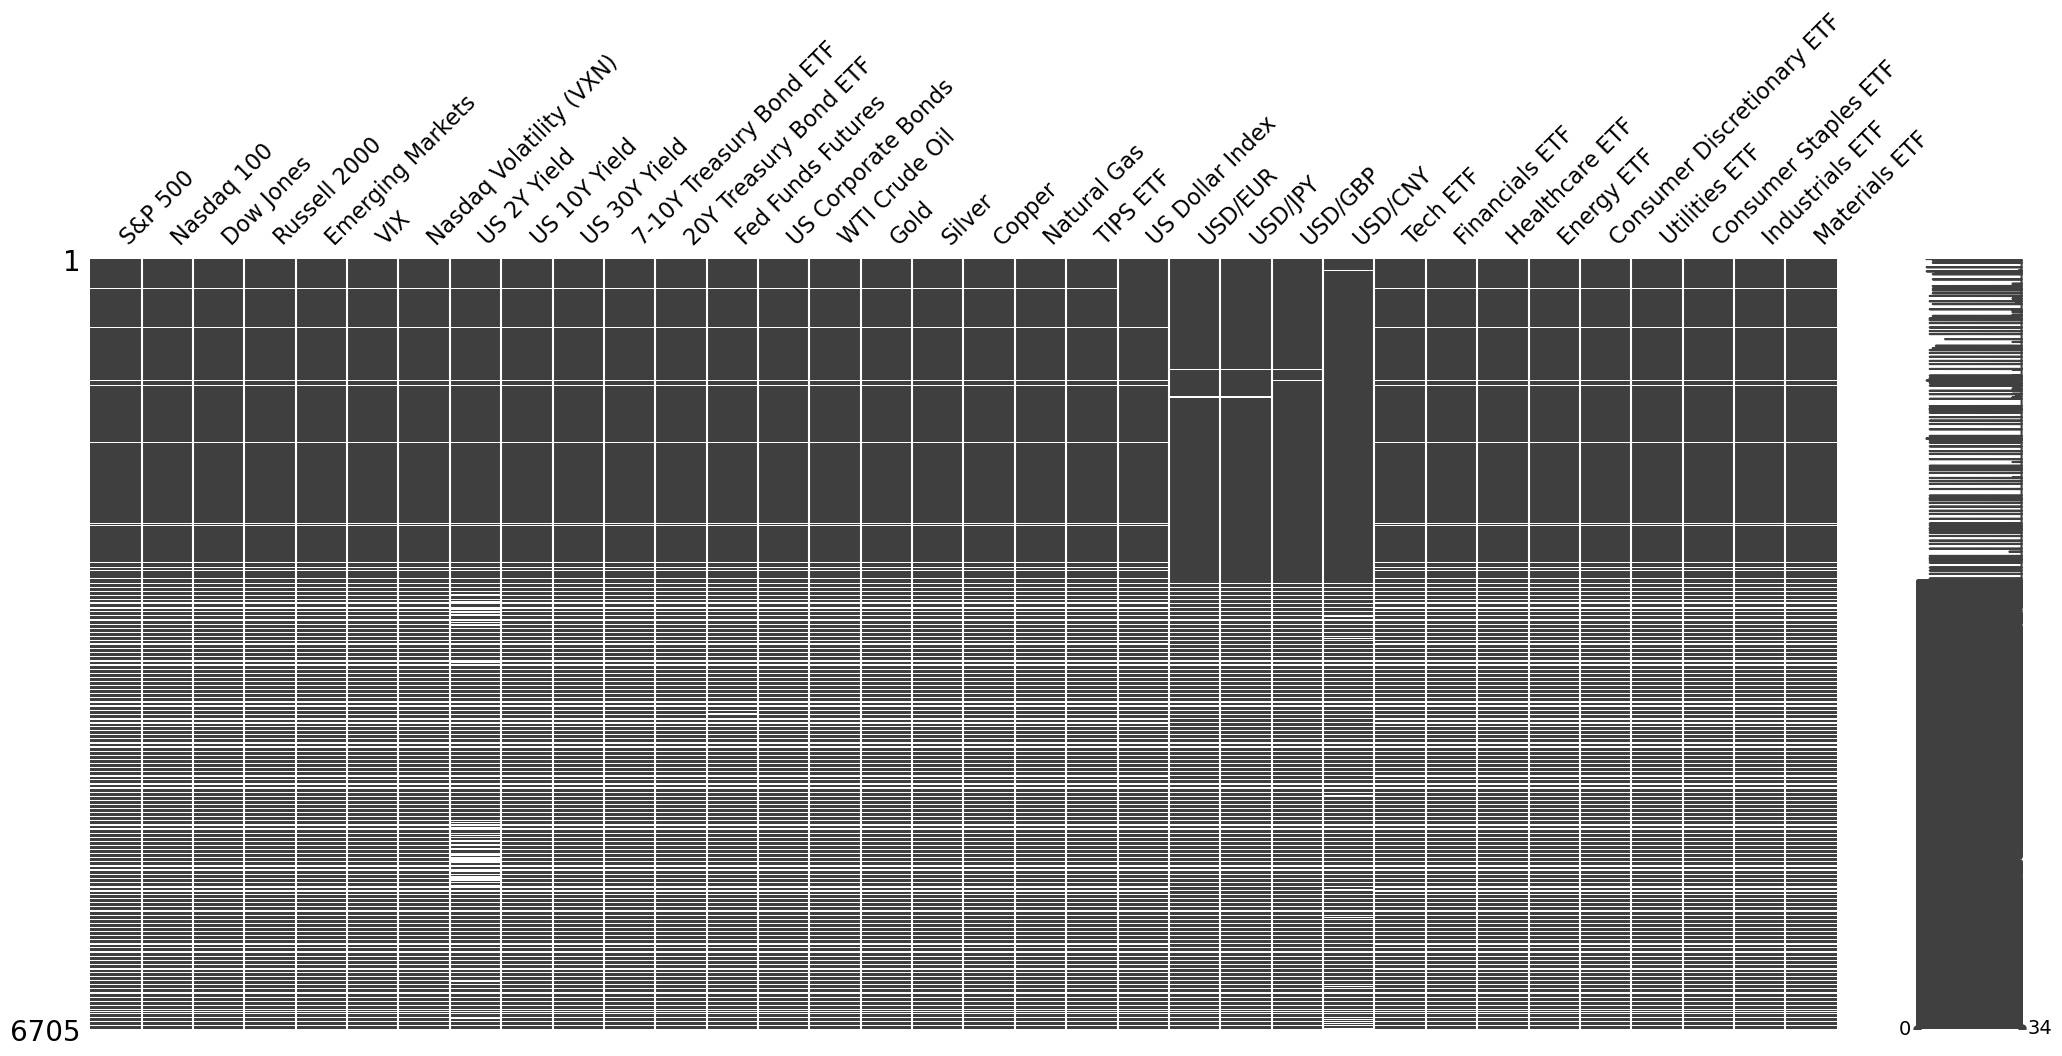

In [10]:
msno.matrix(macro_df_filtered)

In [11]:
macro_df_cleaned = macro_df_filtered.dropna()
macro_df_cleaned.head()

,S&P 500,Nasdaq 100,Dow Jones,Russell 2000,Emerging Markets,VIX,Nasdaq Volatility (VXN),US 2Y Yield,US 10Y Yield,US 30Y Yield,...,USD/CNY,Tech ETF,Financials ETF,Healthcare ETF,Energy ETF,Consumer Discretionary ETF,Utilities ETF,Consumer Staples ETF,Industrials ETF,Materials ETF
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-05,1122.219971,1496.579956,10544.070312,568.919983,12.794835,17.49,23.889999,0.902,4.387,5.175,...,8.267000,15.854705,14.939609,21.322910,15.609103,24.238638,11.146448,12.616064,18.013670,17.050915
2004-01-06,1123.670044,1501.260010,10538.660156,569.890015,12.650259,16.73,22.760000,0.901,4.277,5.106,...,8.267100,15.998282,14.934336,21.386131,15.592423,24.331007,11.122541,12.645186,17.986990,16.899908
2004-01-07,1126.329956,1514.260010,10529.030273,574.619995,12.679770,15.50,21.910000,0.886,4.246,5.084,...,8.267201,16.073854,14.944890,21.519571,15.431157,24.438763,11.179922,12.592768,18.013670,16.811832
2004-01-08,1131.920044,1530.650024,10592.440430,579.619995,12.727712,15.61,21.889999,0.847,4.249,5.080,...,8.267201,16.391247,14.997641,21.428276,15.475640,24.361792,11.175144,12.575290,18.127089,17.000576
2004-01-09,1121.859985,1520.459961,10458.889648,575.200012,12.704847,16.75,23.010000,0.842,4.086,4.967,...,8.267000,16.172089,14.944890,21.294827,15.553499,24.261728,11.136882,12.482102,17.946949,16.704865


In [12]:
macro_df_cleaned.shape

(5036, 34)

<Axes: >

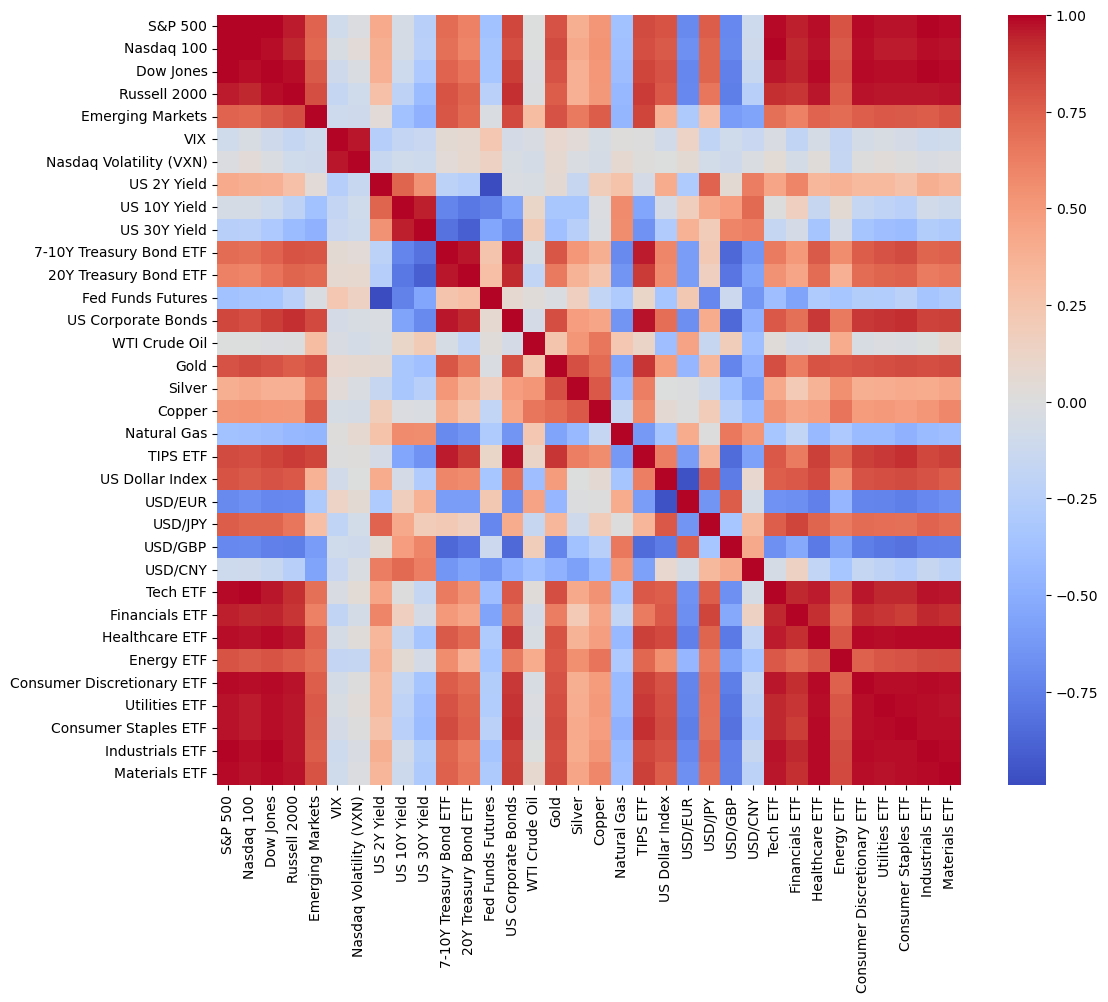

In [13]:
## Correlation matrix
## Select numerical features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
df_num = macro_df_cleaned.select_dtypes(include=["float64", "int64"])
corr = df_num.corr()
sns.heatmap(corr, cmap="coolwarm")

In [15]:
macro_df_cleaned.columns

Index(['S&P 500', 'Nasdaq 100', 'Dow Jones', 'Russell 2000',
       'Emerging Markets', 'VIX', 'Nasdaq Volatility (VXN)', 'US 2Y Yield',
       'US 10Y Yield', 'US 30Y Yield', '7-10Y Treasury Bond ETF',
       '20Y Treasury Bond ETF', 'Fed Funds Futures', 'US Corporate Bonds',
       'WTI Crude Oil', 'Gold', 'Silver', 'Copper', 'Natural Gas', 'TIPS ETF',
       'US Dollar Index', 'USD/EUR', 'USD/JPY', 'USD/GBP', 'USD/CNY',
       'Tech ETF', 'Financials ETF', 'Healthcare ETF', 'Energy ETF',
       'Consumer Discretionary ETF', 'Utilities ETF', 'Consumer Staples ETF',
       'Industrials ETF', 'Materials ETF'],
      dtype='object')

| **Category**              | **Variable**                    | **Explanation & Relevance**                                                                 |
|--------------------------|----------------------------------|---------------------------------------------------------------------------------------------|
| **Equity Markets**       | S&P 500                         | Broad US equity market benchmark, proxy for US large caps.                                  |
|                          | Nasdaq 100                      | US tech-heavy large-cap index, reflects growth sentiment.                                   |
|                          | Dow Jones                       | Price-weighted US industrials-focused equity index.                                         |
|                          | Russell 2000                    | Tracks US small-cap performance, good for domestic economic sentiment.                      |
|                          | Emerging Markets                | Captures equity performance in developing economies.                                        |
| **Volatility / Sentiment**| VIX                             | Implied volatility of S&P 500 options ("fear index").                                       |
|                          | Nasdaq Volatility (VXN)         | Implied volatility on Nasdaq 100; tech sector risk sentiment.                              |
| **Rates & Bonds**        | US 2Y Yield                     | Reflects short-term rate expectations & Fed policy.                                         |
|                          | US 10Y Yield                    | Benchmark long-term yield, widely used for discount rates.                                 |
|                          | US 30Y Yield                    | Longest US Treasury yield, used in mortgages & infrastructure projections.                 |
|                          | 7-10Y Treasury Bond ETF         | Tracks intermediate-term Treasuries (IEF ETF).                                              |
|                          | 20Y Treasury Bond ETF           | Tracks long-dated Treasuries (TLT ETF).                                                     |
|                          | Fed Funds Futures               | Market-based proxy of Fed rate expectations (ZQ=F).                                         |
| **Credit & Spread Risk** | US Corporate Bonds              | Investment-grade bond performance (LQD ETF proxy).                                          |
| **Commodities**          | WTI Crude Oil                   | Benchmark US oil price, energy cost proxy.                                                  |
|                          | Gold                            | Safe haven asset and inflation hedge.                                                       |
|                          | Silver                          | Similar to gold, but more industrial use; volatility hedge.                                 |
|                          | Copper                          | Barometer of global industrial demand and Chinese growth.                                  |
|                          | Natural Gas                     | Volatile energy input, key for utility and manufacturing costs.                             |
| **Inflation Proxies**    | TIPS ETF                        | Tracks Treasury Inflation-Protected Securities (TIP ETF).                                   |
| **FX & Dollar Strength** | US Dollar Index                 | Composite strength of USD against major currencies.                                         |
|                          | USD/EUR                         | Most traded FX pair, key for global trade flow and ECB-Fed divergence.                      |
|                          | USD/JPY                         | Reflects risk-off flows and yield differentials.                                             |
|                          | USD/GBP                         | Monitors UK/US macro divergence and capital flows.                                          |
|                          | USD/CNY                         | Crucial for global supply chain and trade tension sensitivity.                             |
| **Sector ETFs**          | Tech ETF                        | Tracks US technology sector (XLK).                                                          |
|                          | Financials ETF                  | Reflects health of banks and insurers (XLF).                                                |
|                          | Healthcare ETF                  | Defensive sector ETF, includes biotech and pharma (XLV).                                    |
|                          | Energy ETF                      | Tracks oil and gas majors (XLE).                                                            |
|                          | Consumer Discretionary ETF      | Retail, autos, travel; sensitive to consumer confidence (XLY).                             |
|                          | Utilities ETF                   | Defensive sector with interest rate sensitivity (XLU).                                     |
|                          | Consumer Staples ETF            | Non-cyclical products: food, beverages, etc. (XLP).                                         |
|                          | Industrials ETF                 | Covers transportation, machinery, logistics (XLI).                                          |
|                          | Materials ETF                   | Basic materials like chemicals, metals, and paper (XLB).                                    |

In [19]:
macro_df_cleaned_date = macro_df_cleaned.reset_index()
macro_df_cleaned_date.head()

,Date,S&P 500,Nasdaq 100,Dow Jones,Russell 2000,Emerging Markets,VIX,Nasdaq Volatility (VXN),US 2Y Yield,US 10Y Yield,...,USD/CNY,Tech ETF,Financials ETF,Healthcare ETF,Energy ETF,Consumer Discretionary ETF,Utilities ETF,Consumer Staples ETF,Industrials ETF,Materials ETF
0,2004-01-05,1122.219971,1496.579956,10544.070312,568.919983,12.794835,17.49,23.889999,0.902,4.387,...,8.267000,15.854705,14.939609,21.322910,15.609103,24.238638,11.146448,12.616064,18.013670,17.050915
1,2004-01-06,1123.670044,1501.260010,10538.660156,569.890015,12.650259,16.73,22.760000,0.901,4.277,...,8.267100,15.998282,14.934336,21.386131,15.592423,24.331007,11.122541,12.645186,17.986990,16.899908
2,2004-01-07,1126.329956,1514.260010,10529.030273,574.619995,12.679770,15.50,21.910000,0.886,4.246,...,8.267201,16.073854,14.944890,21.519571,15.431157,24.438763,11.179922,12.592768,18.013670,16.811832
3,2004-01-08,1131.920044,1530.650024,10592.440430,579.619995,12.727712,15.61,21.889999,0.847,4.249,...,8.267201,16.391247,14.997641,21.428276,15.475640,24.361792,11.175144,12.575290,18.127089,17.000576
4,2004-01-09,1121.859985,1520.459961,10458.889648,575.200012,12.704847,16.75,23.010000,0.842,4.086,...,8.267000,16.172089,14.944890,21.294827,15.553499,24.261728,11.136882,12.482102,17.946949,16.704865


In [20]:
# We save the dataset
macro_df_cleaned_date.to_csv("macro_dataset.csv", index=False)